In [1]:
#............................................Training & Testing using deep learning......................................#
import os
import cv2
import time
import numpy as np
from keras.layers import Conv2D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'Preprocessed/Train/' #To retrieve an image file from the "Train" directory within the "Preprocessed" directory

In [3]:
gestures = os.listdir(path) # creates a list of all files and directories at the specified file path, and assigns it to the variable 'gestures'

In [4]:
dict_labels = { # maps labels to specific keys using the pre-defined dictionary "dict_labels".
    'out': 1, # the key 'out' is mapped to the integer value 1.
    'noball': 2 # the key 'noball' is mapped to the integer value 2.
   
    
}

In [5]:
print(list(dict_labels.keys())) # prints a list of the keys in the dictionary "dict_labels", which in this case are 'out' and 'noball'.

['out', 'noball']


In [6]:
x, y = [], [] # creates two empty lists named 'x' and 'y' and assigns them to the variables 'x' and 'y'.
for ix in gestures: # This is a for loop in Python that loops through a list named "gestures" and assigns each element to the variable "ix".
    images = os.listdir(path + ix) # retrieving a list of files and directories located in a folder obtained by combining a variable 'path' with the current element 'ix' in the loop, and saves the list to a variable 'images'
    for cx in images: # Python loop iterates each "images" element, assigning to variable "cx"
        img_path = path + ix + '/' + cx # creating a file path for a specific image by concatenating the strings 'path', 'ix', and 'cx', and stores it in the variable 'img_path'
        img = cv2.imread(img_path, 0) # here OpenCV library's 'imread' function is used to read a grayscale image from the file path stored in 'img_path' and assigns it to the variable 'img'.
        img = img.reshape((50,50,1)) # reshaping an image into a 3D array with dimensions 50x50x1.
        img = img/255.0 # normalizes the pixel values of an image by scaling them down to a range of 0 to 1
        x.append(img) # adds an image or array of pixel values to the end of a list.
        y.append(dict_labels[ix]) # contains labels of the image 

In [7]:
X = np.array(x) # converts a list x into a NumPy array X
Y = np.array(y) # converts a list y into a NumPy array Y
Y = np_utils.to_categorical(Y) # puts the labels into ctegory example (1. no ball,2.out)
print(type(Y),len(Y)) #  prints the data type and length of the variable.
Y.shape # outputs the shape or dimensions of the NumPy array Y

<class 'numpy.ndarray'> 2000


(2000, 3)

<AxesSubplot:ylabel='count'>

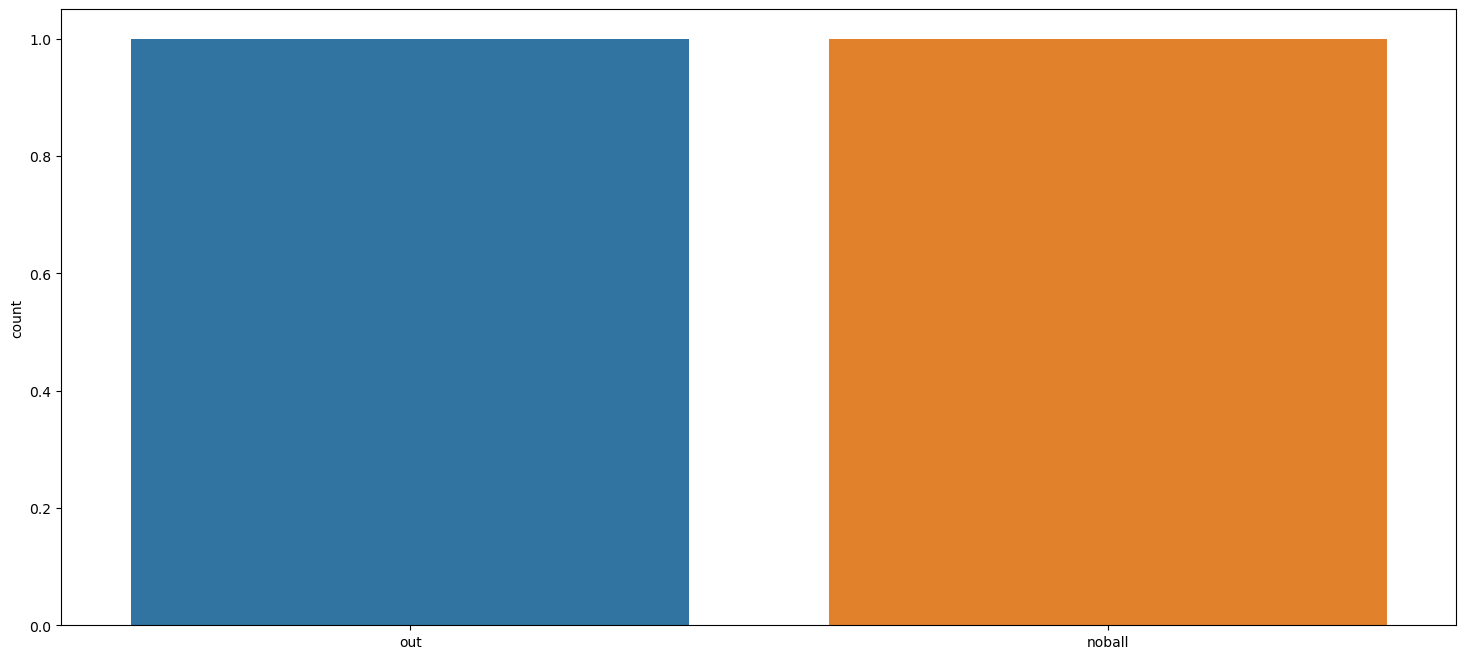

In [8]:
plt.figure(figsize = (18,8)) # creates a new Matplotlib figure with dimensions of 18 inches by 8 inches for plotting or visualizing data.
sns.countplot(x=list(dict_labels.keys())) # sns (seabor) , creates a count plot using Seaborn to visualize the number of occurrences of each category key in a dictionary dict_labels 

In [9]:
Y.shape # tells us how many elements are present along each axis or dimension in the NumPy array Y.

(2000, 3)

In [10]:
categories = Y.shape[1] # assigns the number of columns or categories present in the one-hot encoded NumPy array Y to the variable categories.

In [11]:
X, Y = shuffle(X, Y, random_state=0) # shuffles two NumPy arrays X and Y randomly in  with a seed value of 0 using shuffle() function from scikit-learn: X , (random state = 0) means how many times it is going to shuffle.

In [12]:
X.shape # returns the dimensions or shape of the NumPy array X, which has a length of 2000 in the first dimension (rows), and 50 in each of the remaining three dimensions (columns, height, and channel), where the last dimension represents the number of color channels in the image (1 for grayscale or 3 for RGB).

(2000, 50, 50, 1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # dividing the data into train,test,split ,This code uses the scikit-learn train_test_split() function to split two NumPy arrays X and Y into a training set and a testing set, with a 70/30 ratio and returns four arrays: X_train, X_test, Y_train, and Y_test.

In [14]:
print(X_train.shape, X_test.shape) # prints the dimensions or shapes of the training and testing sets of the NumPy arrays X, which have 1400 and 600 rows, respectively, and a common shape of (50, 50, 1) representing the size of each image in the dataset.
print(Y_train.shape, Y_test.shape) # prints the shapes of the training and testing sets of the one-hot encoded NumPy array Y, which have 1400 and 600 rows, respectively, and 3 columns representing the 3 categories in the dataset.

(1400, 50, 50, 1) (600, 50, 50, 1)
(1400, 3) (600, 3)


In [15]:
model = Sequential() # using sequential model by importing the keras.models , from sequential model we are getting the object and the object name is smodel.
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) )) #convolutional contains multiple layer so the first layer is convo2D layer where we are passing the input where 64 is filter size, relu  is activation function and 3*3 is kernel size(to load data more memory is required)
model.add(MaxPooling2D(pool_size = (2, 2))) # adds a layer to the neural network model using Keras that performs max pooling, which reduces the size of the output from the previous layer by taking the maximum value within a 2x2 window. This helps to reduce the number of parameters and prevent overfitting.

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 

model.add(Flatten()) # adds a flatten layer to the neural network model using Keras that converts the 2D input data into a 1D array, which can be passed to the next fully connected layer.
model.add(Dense(128, activation = 'relu')) # dense layer is important layer main learning process goes on 128 is its memory size
model.add(Dropout(0.20)) # adds a dropout layer to the neural network model using Keras that randomly sets 20% of the input units to 0 during each training epoch, which helps to reduce overfitting
model.add(Dense(categories, activation = 'softmax')) # total no. of categories is passed for lassification

model.summary() # displays a summary of the neural network model using Keras that includes the layers, output shape, number of parameters, and activation functions.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [16]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy') # compiles the neural network model using Keras with the Adam optimizer, 'accuracy' as the performance metric, and categorical crossentropy as the loss function to minimize during training.

In [17]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=[X_test, Y_test])# training process x_train contains data and y_train contains labels , epoch = 50 means 50 times iteration is done, 128 image it process .

Epoch 1/50
11/11 [==============================] - 8s 558ms/step - loss: 0.4349 - accuracy: 0.8679 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2/50
11/11 [==============================] - 6s 558ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.6665e-05 - val_accuracy: 1.0000
Epoch 3/50
11/11 [==============================] - 5s 476ms/step - loss: 1.7212e-04 - accuracy: 1.0000 - val_loss: 1.9073e-08 - val_accuracy: 1.0000
Epoch 4/50
11/11 [==============================] - 6s 510ms/step - loss: 9.0148e-07 - accuracy: 1.0000 - val_loss: 1.1126e-08 - val_accuracy: 1.0000
Epoch 5/50
11/11 [==============================] - 5s 474ms/step - loss: 5.8707e-07 - accuracy: 1.0000 - val_loss: 1.0331e-08 - val_accuracy: 1.0000
Epoch 6/50
11/11 [==============================] - 5s 471ms/step - loss: 2.6192e-07 - accuracy: 1.0000 - val_loss: 1.0331e-08 - val_accuracy: 1.0000
Epoch 7/50
11/11 [==============================] - 5s 473ms/step - loss: 2.8499e-07 - accuracy: 1.0000 - val_lo

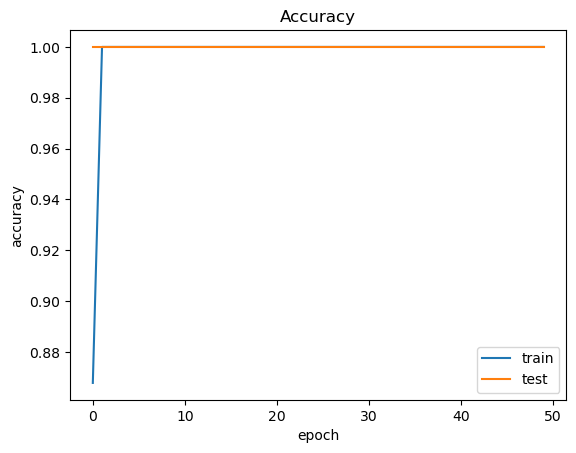

In [18]:
plt.plot(history.history['accuracy']) # plots the accuracy metric over the course of the training epochs, which allows us to visualize how well the model is learning from the training data
plt.plot(history.history['val_accuracy']) #  plots the validation accuracy metric over the course of the training epochs, which allows us to visualize how well the model is generalizing to new, unseen data.
plt.title("Accuracy") # sets the title of the plot to "Accuracy".
plt.xlabel('epoch') # sets the label of the x-axis of the plot to "epoch".
plt.ylabel('accuracy') # sets the label of the y-axis of the plot to "accuracy".
plt.legend(['train','test']) # adds a legend to the plot with the labels "train" and "test".
plt.show() # displays the plot.


In [19]:
model.save('CNN_model.h5') # Saves the trained CNN model to a file named 'CNN_model.h5' h5 is file format

In [20]:
m = load_model('CNN_model.h5') #  loads the saved CNN model from the 'CNN_model.h5' file into a variable named 'm'.

In [21]:
test_data = os.listdir('Test/') #  reads the names of all the files present in the 'Test/' directory and stores them in a list called 'test_data'.

In [22]:
dict_labels # dict_labels refers to a dictionary containing the mapping of the categorical labels to their respective string labels.

{'out': 1, 'noball': 2}

In [23]:
for ix in test_data: # for loop that iterates through each element in the test_data list.
    print(ix) # nts the value of the variable ix

noball
out


In [24]:
x, y = [], [] # initializes two empty lists, x and y.
for ix in test_data: # for loop iterating over each file name in the test_data list.
    images = os.listdir('Test/' + ix) #  lists all the files in the directory 'Test/' + ix, where ix is a string variable that represents a specific folder in the 'Test/' directory.For example, if ix is 'cat', the code will list all the files in the 'Test/cat' directory.
    for cx in range(1,201): # for loop that runs 200 times, from cx = 1 to cx = 200. During each iteration of the loop, the code inside the loop is executed.
        img_path = 'Test/' + ix + '/' + str(cx) + '.jpg' # Loop through each subdirectory in the Test directory, then loop through each of the 200 images in that subdirectory, constructing the file path for each image.
        img = cv2.imread(img_path, 0) # reads an image using OpenCV library from the specified file path 'img_path' in grayscale mode, meaning the image will be loaded in black and white format.
        img = img.reshape((50,50,1)) #  takes the image array img and reshapes it to a 3D array of shape (50,50,1), where the first two dimensions represent the image dimensions and the last dimension is the number of channels. Here, there is only one channel as the images are grayscale.
        img = img/255.0 
        x.append(img) 
        y.append(dict_labels[ix])  

In [25]:
X_t = np.array(x) # creates a numpy array X_t from the list x by converting it to a numpy array. This is often done to convert a list of arrays or values into a format that can be used in machine learning models. In this case, it is likely that x contains a list of images that have been preprocessed and resized for use in a machine learning model.
y_t = np.array(y) 
Y_t = np_utils.to_categorical(y_t) # converts a class vector (integers) to binary class matrix. In other words, it converts the label (Y_t) into a one-hot encoding format so that the model can predict the label for each test image.

In [26]:
X_t.shape # means that the shape of the numpy array X_t is (400, 50, 50, 1), where 400 is the number of samples, 50 is the width and height of each image in pixels, and 1 represents that the images are grayscale.

(400, 50, 50, 1)

In [27]:
y_pred = m.predict(X_t) # code is using the trained model m to make predictions on the test data X_t and storing the predictions in the variable y_pred. The output shows that the predictions were made for 13 batches of test data and the processing time for each batch.

13/13 [==============================] - 1s 35ms/step


In [28]:
acc = accuracy_score(Y_t, y_pred.round()) # The accuracy_score function from the sklearn.metrics module is used to calculate the accuracy score between predicted y_pred and actual labels Y_t, which is stored in variable acc.
print('Accuracy:', acc) # prints the string "Accuracy:" followed by the value of the variable acc, which is the accuracy score of the predicted labels compared to the actual labels. In this case, the accuracy is perfect (1.0).

Accuracy: 1.0


In [29]:
print(classification_report(y_pred.round(), Y_t)) # The classification_report() function prints the precision, recall, and F1-score for each class and the overall accuracy of the model, based on the predicted and true labels of the test set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200

   micro avg       1.00      1.00      1.00       400
   macro avg       0.67      0.67      0.67       400
weighted avg       1.00      1.00      1.00       400
 samples avg       1.00      1.00      1.00       400

